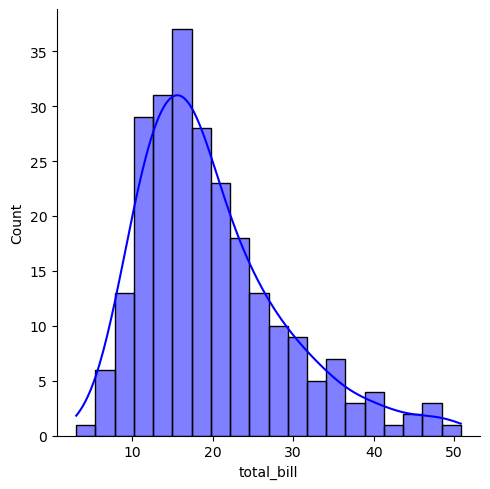

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#Histogram (distplot)

# kde: (kernel density estimation )
tips = sns.load_dataset('tips')

sns.displot(tips['total_bill'], color = 'Blue',bins =20,kde = True)
plt.show()

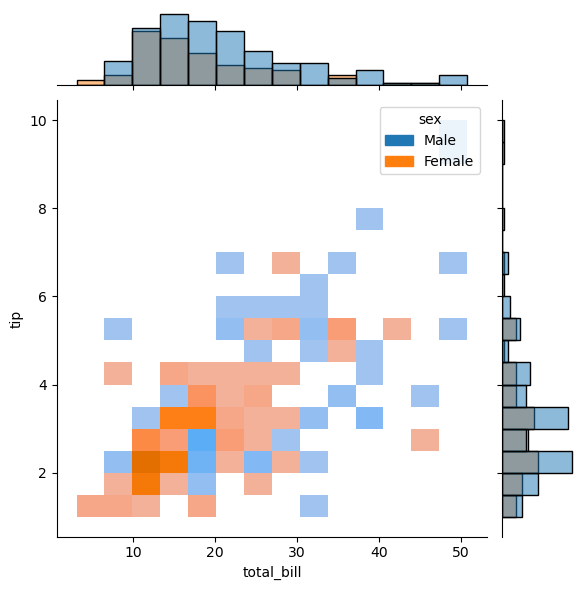

In [2]:
#Joint Plot
#kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
sns.jointplot(tips,x='total_bill',y='tip',kind = 'hist',hue = 'sex')
plt.show()

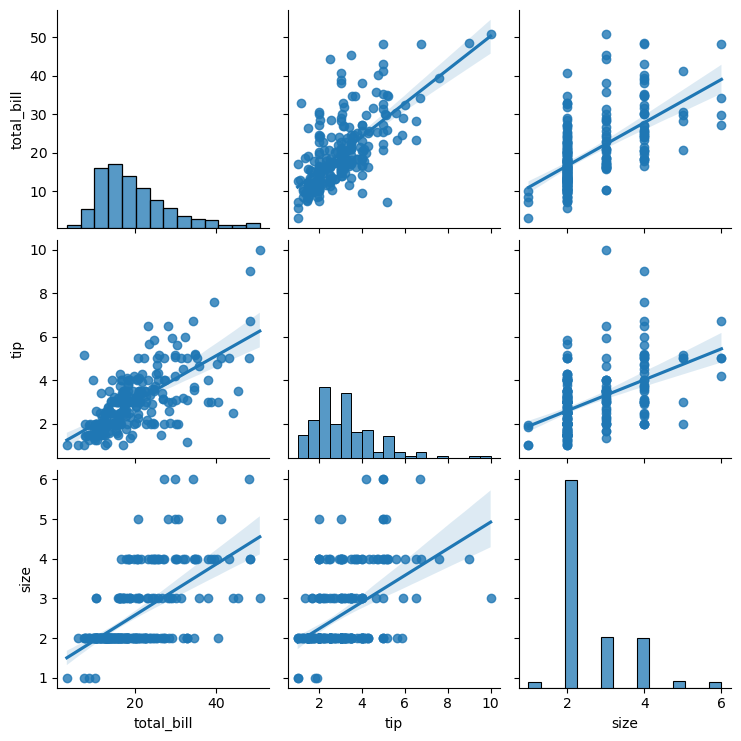

In [3]:
#pair plot :D
# kind : {'scatter', 'kde', 'hist', 'reg'}
sns.pairplot(tips, kind = 'reg')
plt.show()

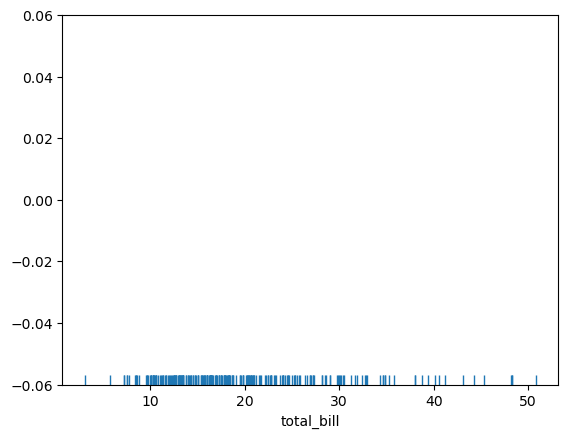

In [4]:
#rug plot

sns.rugplot(tips,x='total_bill' )

plt.show()

In [5]:
list(tips.columns)


['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

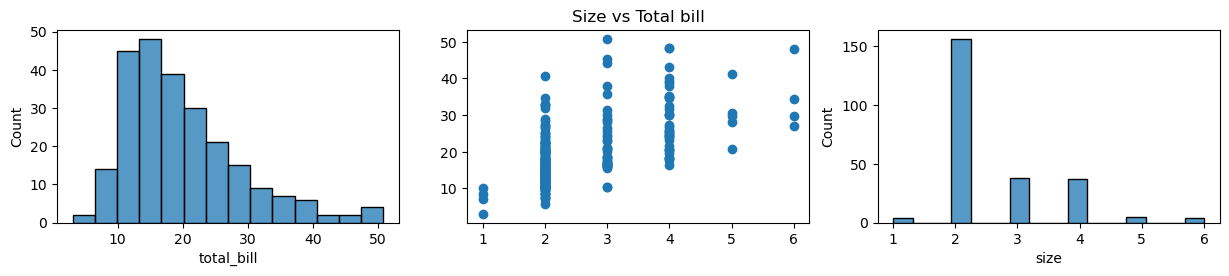

In [6]:
fig, ax = plt.subplots(1,3,figsize = (15,2.5))

sns.histplot(tips['total_bill'],ax = ax[0])


ax[1].scatter(tips['size'],tips['total_bill'])
ax[1].set_title('Size vs Total bill')

sns.histplot(tips['size'],ax = ax[2])


plt.show()

(0.0, 1.0)

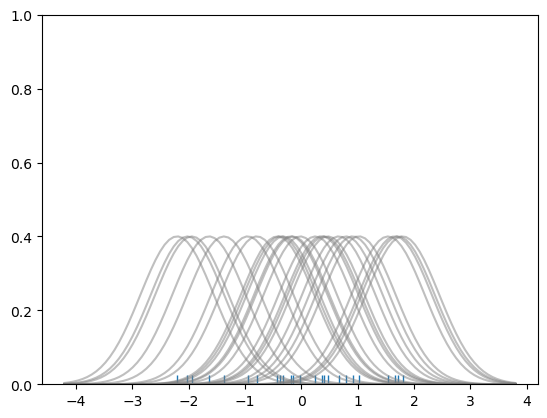

In [7]:
# KDE explained

# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

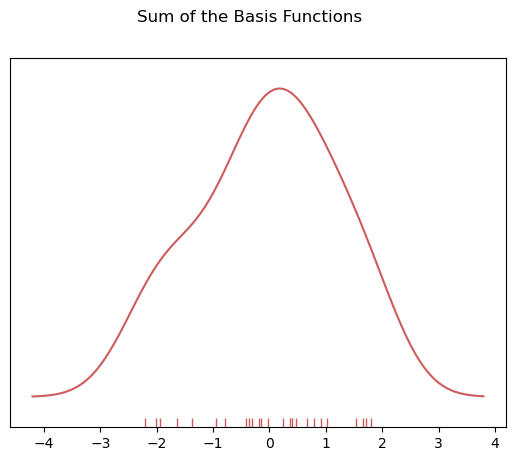

In [8]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

Text(0.5, 0, 'hi')

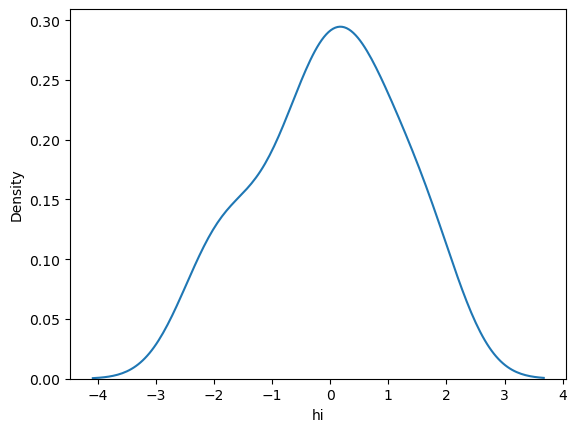

In [9]:
sns.kdeplot(dataset)
plt.xlabel('hi')

### Categorical Plots

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


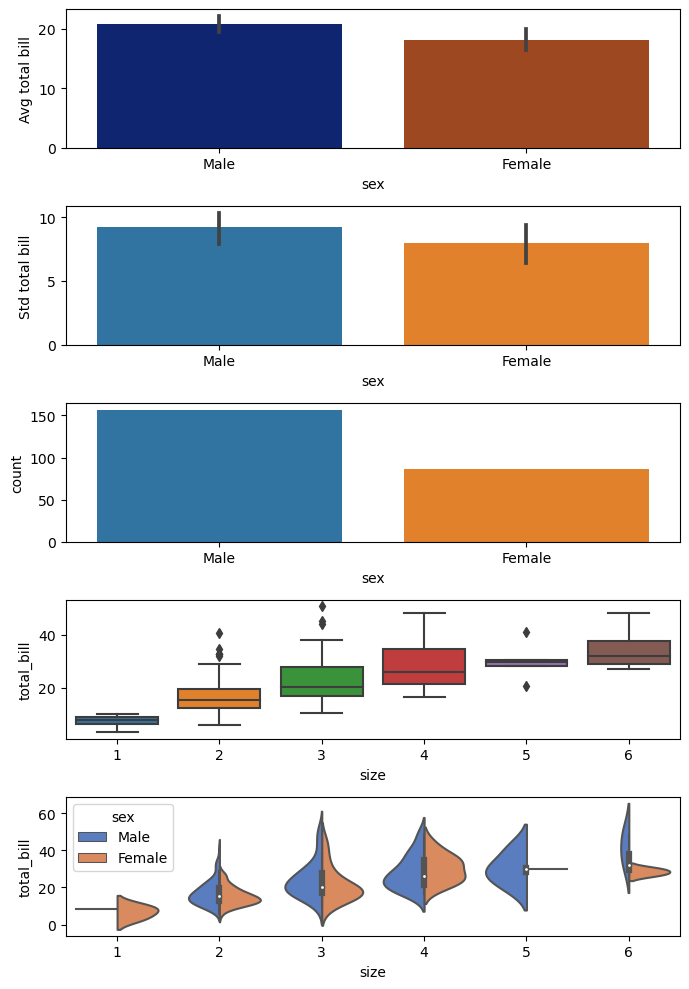

In [11]:
fig, ax = plt.subplots(5,1,figsize = (7,10))


# Bar plot
sns.barplot(tips, x = 'sex', y= 'total_bill', ax = ax[0], estimator='mean',palette='dark') 
ax[0].set_ylabel('Avg total bill')

sns.barplot(tips, x = 'sex', y= 'total_bill', ax = ax[1], estimator= np.std)  #extimator can be any func
ax[1].set_ylabel('Std total bill')

# count plot
sns.countplot(tips, x = 'sex', ax = ax[2])

#Box Plot

sns.boxplot(tips, x = 'size', y = 'total_bill',ax = ax[3])

sns.violinplot(tips, x = 'size', y = 'total_bill',ax = ax[4], hue = 'sex', split=True, palette='muted')


plt.tight_layout()
plt.show()

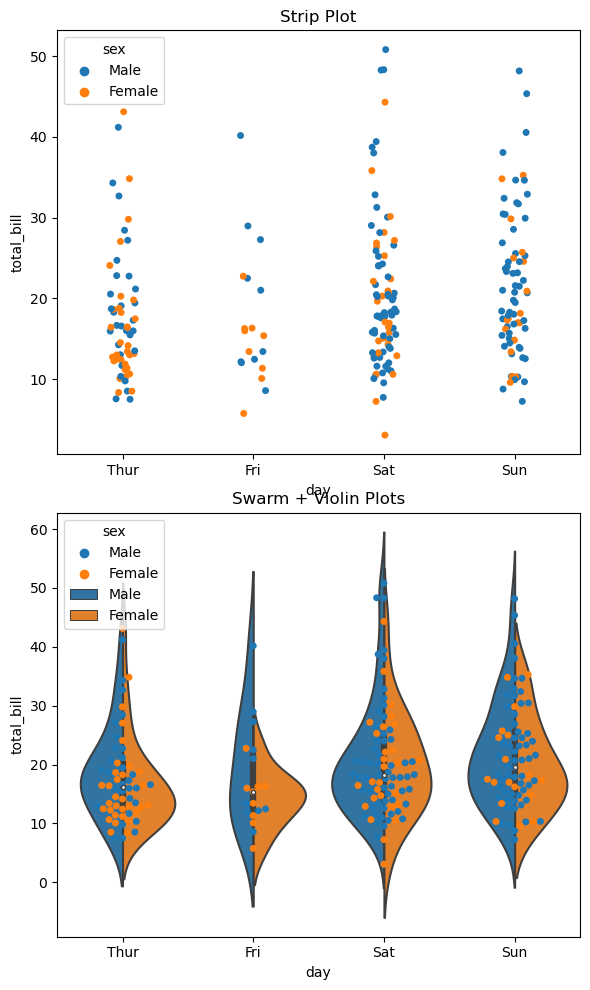

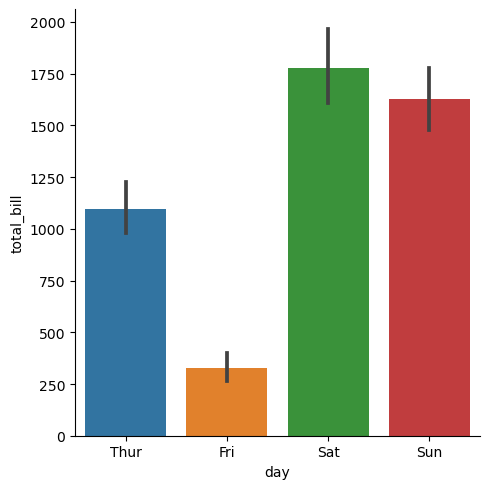

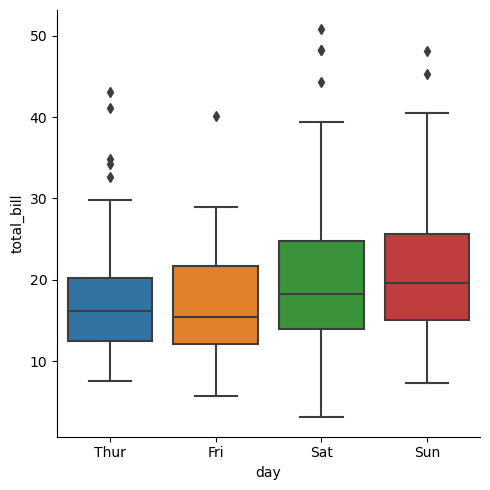

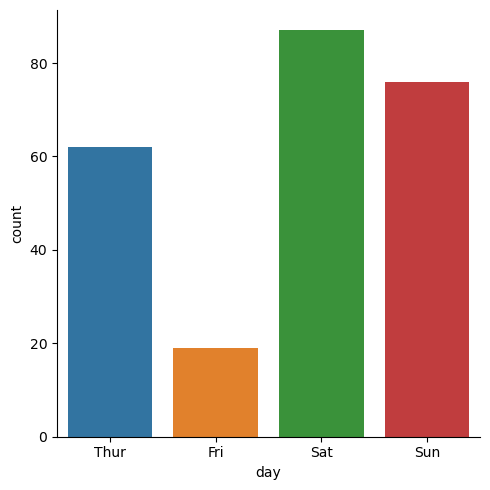

In [12]:
fig, ax = plt.subplots(2,1,figsize = (6,10))


# Strip Plot
sns.stripplot(x='day' ,y='total_bill' ,data = tips, ax = ax[0],jitter=True, hue = 'sex')
ax[0].set_title('Strip Plot')



# Sworm Plot
sns.swarmplot(x='day' ,y='total_bill' ,data = tips, ax = ax[1], hue = 'sex')
sns.violinplot(x='day' ,y='total_bill' ,data = tips, ax = ax[1], hue  = 'sex', split = True)
plt.tight_layout()
plt.savefig('test.pdf')
ax[1].set_title('Swarm + Violin Plots')

# cat plot (the general of categorical data) 
sns.catplot(tips, x='day' , y='total_bill' ,kind = 'bar',estimator='sum' )
sns.catplot(tips, x='day' , y='total_bill' ,kind = 'box')
sns.catplot(tips, x='day',kind = 'count')
plt.tight_layout()


"""
Categorical scatterplots:

- :func:`stripplot` (with `kind="strip"`; the default)
- :func:`swarmplot` (with `kind="swarm"`)

Categorical distribution plots:

- :func:`boxplot` (with `kind="box"`)
- :func:`violinplot` (with `kind="violin"`)
- :func:`boxenplot` (with `kind="boxen"`)

Categorical estimate plots:

- :func:`pointplot` (with `kind="point"`)
- :func:`barplot` (with `kind="bar"`)
- :func:`countplot` (with `kind="count"`)
"""
plt.show()

### Matrics Plots

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10624\2042998097.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(), annot=True, cmap='coolwarm',ax = ax[1])


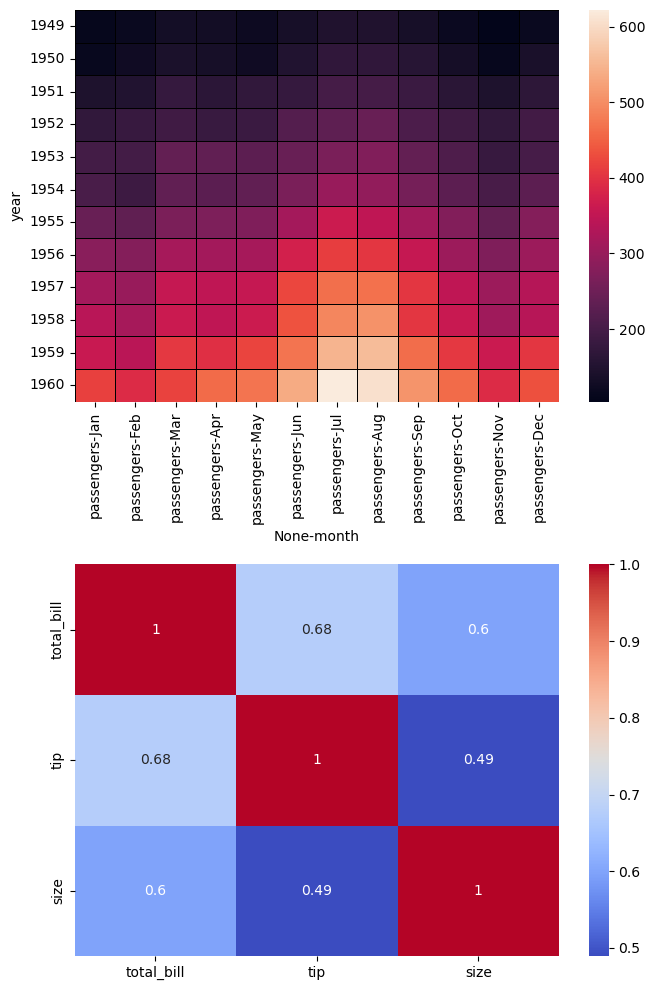

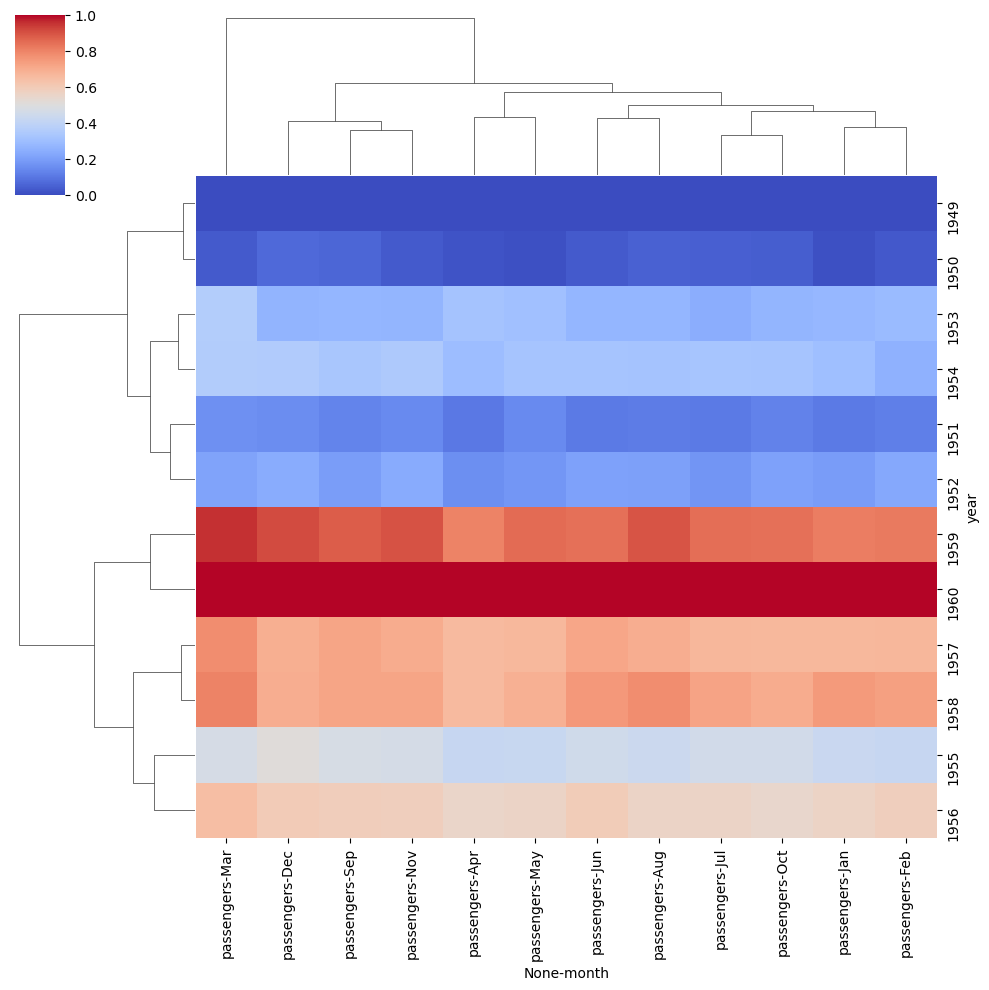

In [13]:
flights = sns.load_dataset('flights')


fig, ax = plt.subplots(2, figsize = (7,10))

#Heat map out of matrix
matrix = flights.groupby(['year','month']).sum().unstack()

matrix
sns.heatmap(matrix, linewidths=0.5, linecolor= 'black',ax = ax[0])


#corr and heat map combination
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm',ax = ax[1])

plt.tight_layout()

#cluster plot
sns.clustermap(matrix, standard_scale=1, cmap = 'coolwarm')
plt.show()

### PairGrids

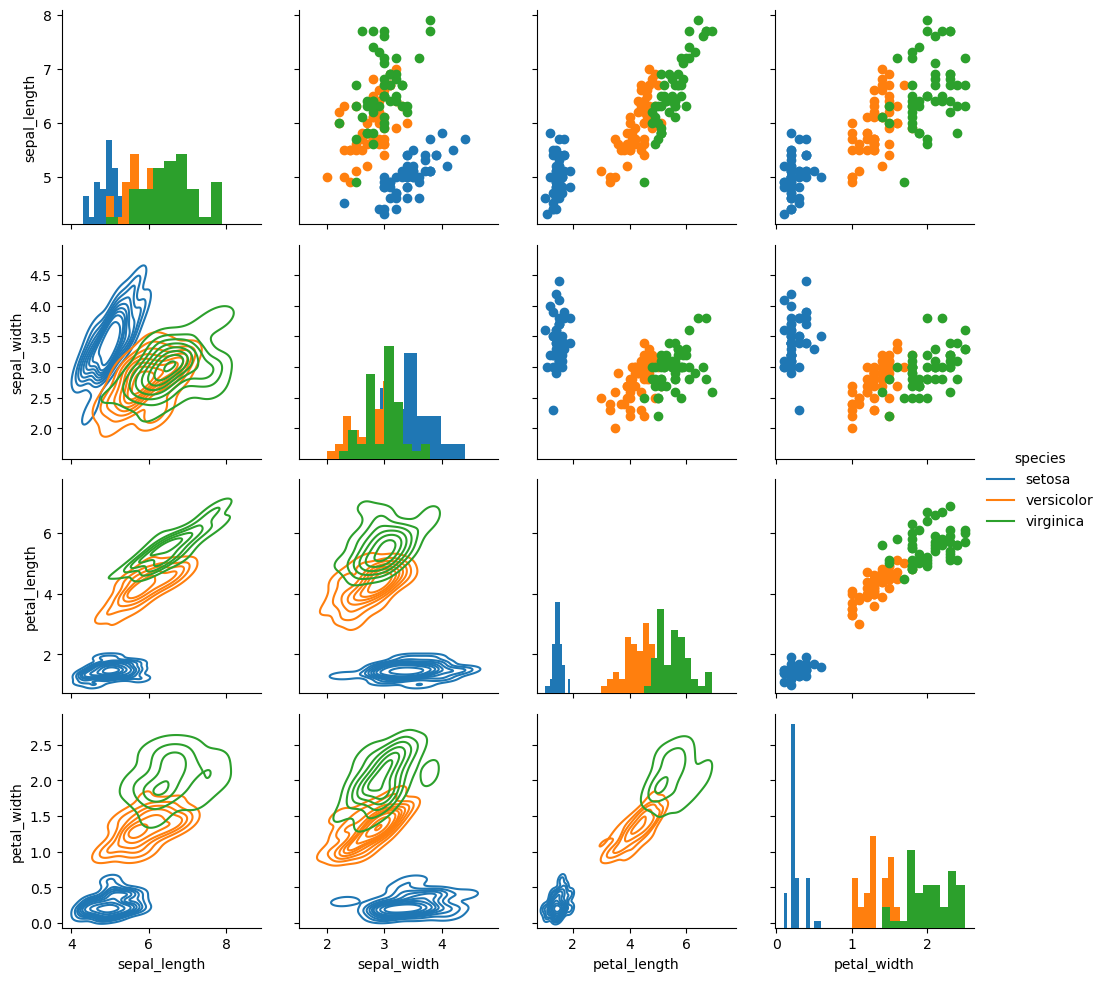

In [14]:
iris = sns.load_dataset('iris')

#Pair Grids
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

### FacitGrid

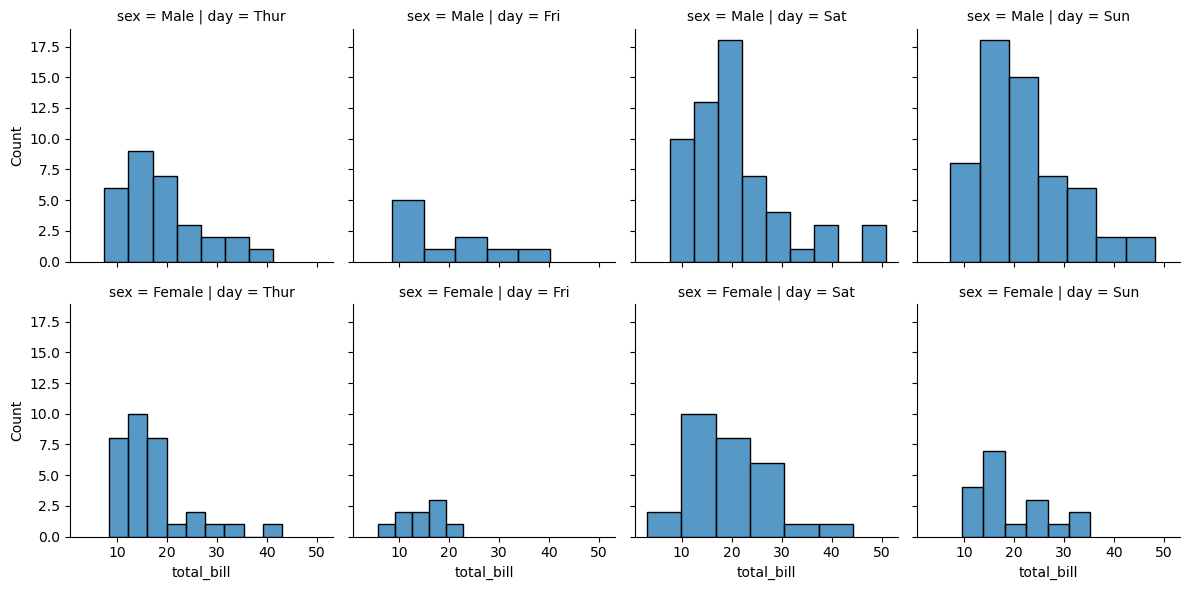

In [15]:
g = sns.FacetGrid(tips, row='sex', col ='day' ) #matrix of distrubutions


g.map(sns.histplot,'total_bill')
plt.show()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


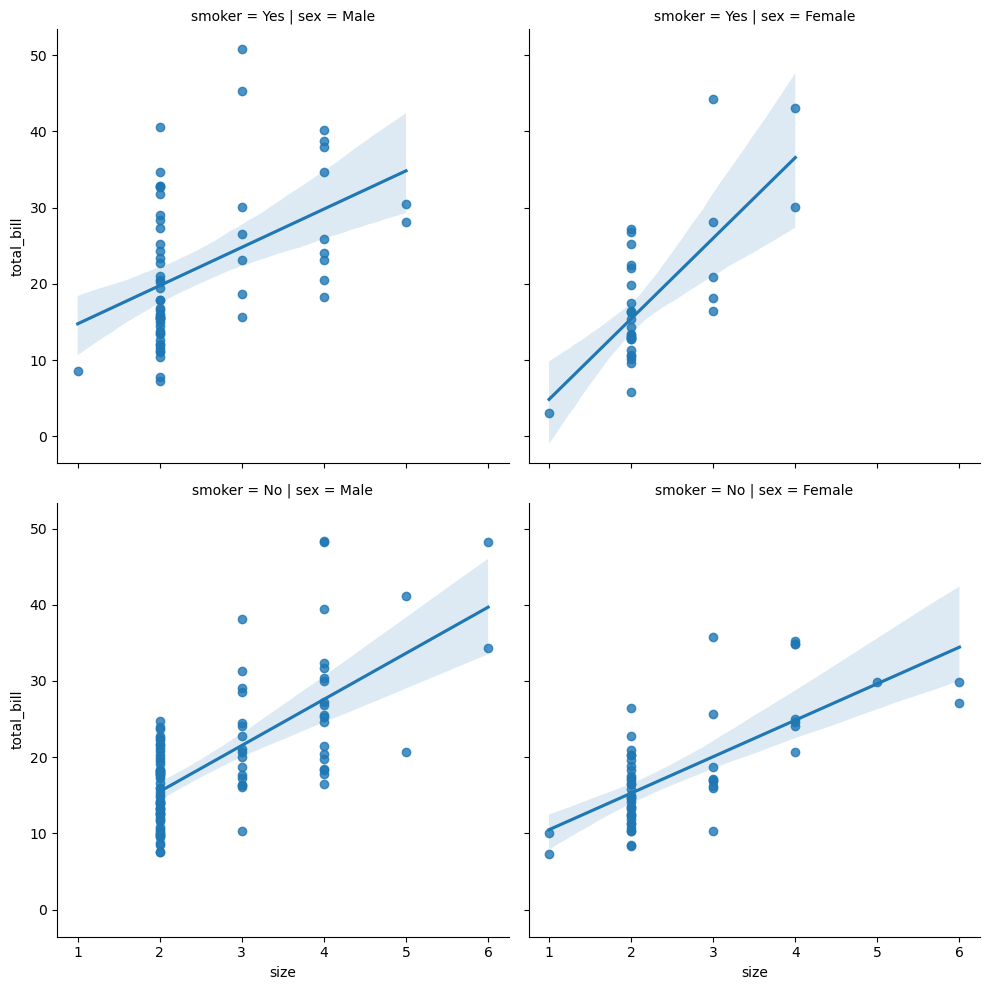

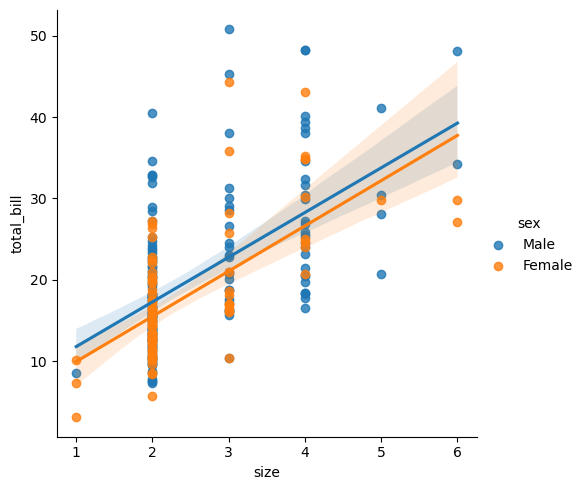

In [16]:
# Regression LM (Linear Model)
print(list(tips.columns))

sns.lmplot(tips,x='size',y='total_bill', col = 'sex' , row='smoker')



sns.lmplot(tips,x='size',y='total_bill', hue= 'sex')
plt.show()

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='sex', ylabel='count'>

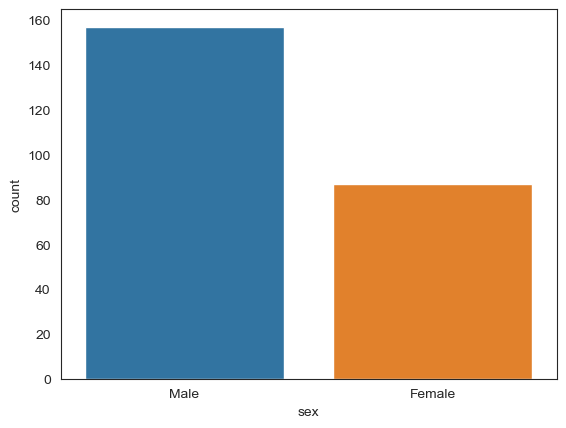

In [18]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

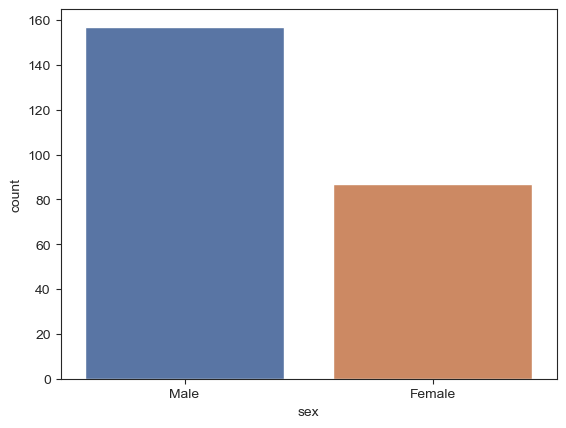

In [19]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

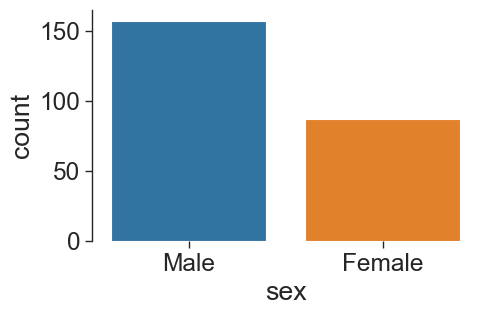

In [60]:
plt.figure(figsize = (5,3))
sns.set_context('paper', font_scale=2) #choose one of {paper, notebook, talk, poster}
sns.countplot(x='sex',data=tips)

sns.despine(left = False, bottom=True)

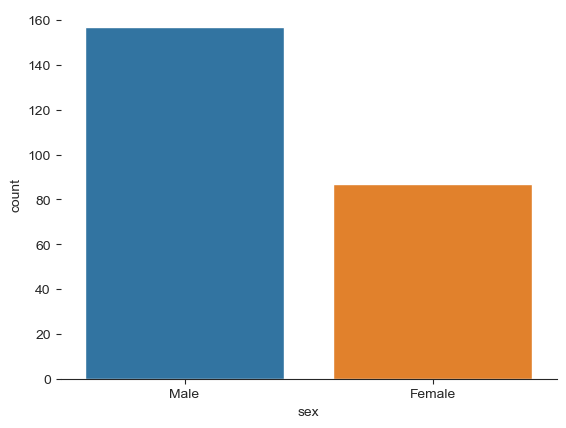

In [21]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

<Axes: xlabel='sex', ylabel='count'>

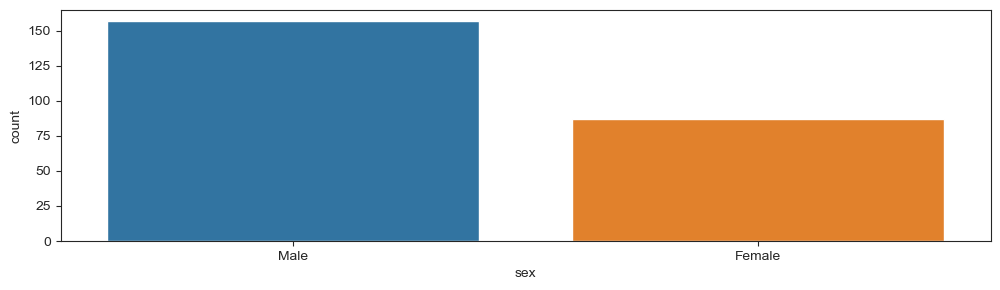

In [22]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

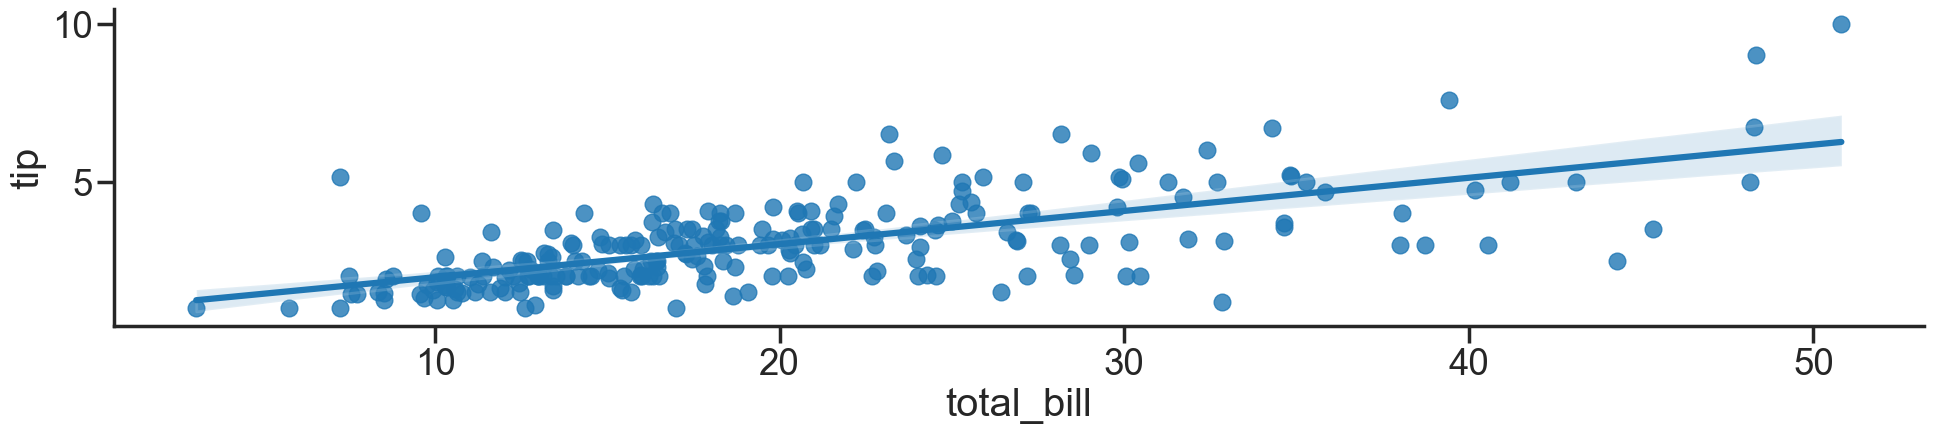

In [33]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',aspect=4,data=tips)

<Axes: xlabel='sex', ylabel='count'>

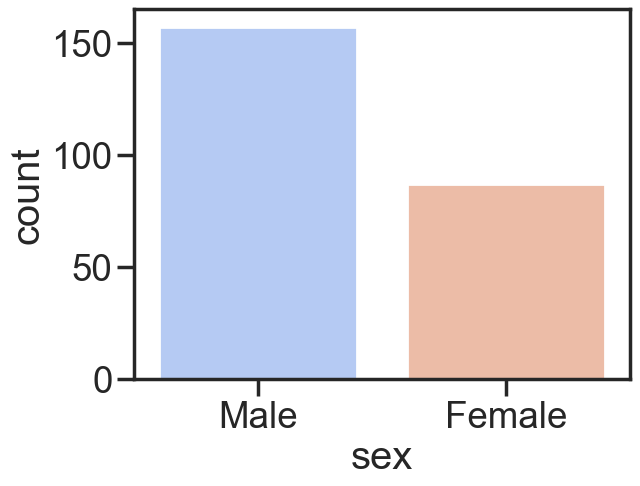

In [32]:
sns.set_context('poster',font_scale=1.2)
sns.countplot(x='sex',data=tips,palette='coolwarm')